In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
# from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import OneHotEncoder
import torch


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



In [ ]:
pip install InstructorEmbedding


In [ ]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=358f296d793fc9428d4b35235a23f195248f21c0a5bfa6e64434cf3618f78573
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
from InstructorEmbedding import INSTRUCTOR

# BERT

In [ ]:
# Load pre-trained BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

In [ ]:
# Load your CSV file
file_path = "train.csv"
df = pd.read_csv(file_path)



In [ ]:
df

,ID,Text,label
0,0,I can't shake off this constant sense of hopel...,Depression
1,1,I'm constantly second-guessing myself and my d...,Anxiety Disorder
2,2,"I'm feeling physically unwell, but I know it's...",Depression
3,3,I'm desperate to escape the overwhelming fear.,Panic Disorder
4,4,It's hard to describe the sensation of being t...,Panic Disorder
...,...,...,...
780,780,I'm not good enough for anything.,Depression
781,781,"Feeling like I'm a trailblazer, forging a path...",Narcissistic Disorder
782,782,Trying to maintain my self-assuredness without...,Narcissistic Disorder
783,783,Feeling like I have the potential to influence...,Narcissistic Disorder


In [ ]:
# Drop the first column ("ID")
df = df.drop(columns=["ID"])


In [ ]:
df

,Text,label
0,I can't shake off this constant sense of hopel...,Depression
1,I'm constantly second-guessing myself and my d...,Anxiety Disorder
2,"I'm feeling physically unwell, but I know it's...",Depression
3,I'm desperate to escape the overwhelming fear.,Panic Disorder
4,It's hard to describe the sensation of being t...,Panic Disorder
...,...,...
780,I'm not good enough for anything.,Depression
781,"Feeling like I'm a trailblazer, forging a path...",Narcissistic Disorder
782,Trying to maintain my self-assuredness without...,Narcissistic Disorder
783,Feeling like I have the potential to influence...,Narcissistic Disorder


In [ ]:
# Calculate embeddings for each text using BERT
def calculate_embeddings(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embeddings



In [ ]:
embeddings = [calculate_embeddings(text) for text in df["Text"]]

# Perform one-hot encoding for labels
label_encoder = OneHotEncoder(sparse_output=False)
labels_encoded = label_encoder.fit_transform(df[["label"]])

# Save embeddings and one-hot encoded labels to a new CSV file
output_data = np.concatenate((embeddings, labels_encoded), axis=1)
output_columns = [f"embedding_{i}" for i in range(embeddings[0].shape[0])] + list(label_encoder.categories_[0])
output_df = pd.DataFrame(output_data, columns=output_columns)
output_df.to_csv("processed_data.csv", index=False)

# tfidf

In [ ]:
# Sample data
data =df

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Define the labels
labels = [
    "Depression",
    "Anxiety Disorder",
    "Panic Disorder",
    "Narcissistic Disorder",
    "Anger/ Intermittent Explosive Disorder",
]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the "Text" column using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Label encoding for the "label" column
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# One-hot encoding for the "label_encoded" column
one_hot_encoder = OneHotEncoder(categories='auto', sparse_output=False)
label_encoded = df['label_encoded'].values.reshape(-1, 1)
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)

# Convert the one-hot encoded labels to a DataFrame
label_columns = [f'label_{label}' for label in labels]
label_df = pd.DataFrame(one_hot_encoded, columns=label_columns)



# Concatenate the TF-IDF DataFrame and one-hot encoded label DataFrame
result_df = pd.concat([tfidf_df, label_df], axis=1)

# Save the result to a CSV file
result_df.to_csv('tfidf.csv', index=False)


# instructor-xl


In [ ]:
# Create an InstructorXL object
instructor = INSTRUCTOR('hkunlp/instructor-xl')

In [ ]:
# Load the data
data = df

# Create a list of unique labels
labels = sorted(data["label"].unique())

# Create a one-hot encoder for the labels
one_hot_encoder = OneHotEncoder(categories=labels, handle_unknown="ignore")

# # Transform the labels into one-hot encoded vectors
# labels_one_hot = one_hot_encoder.fit_transform(data[["label"]]).toarray()

# Label encoding for the "label" column
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# One-hot encoding for the "label_encoded" column
one_hot_encoder = OneHotEncoder(categories='auto', sparse_output=False)
label_encoded = df['label_encoded'].values.reshape(-1, 1)
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)

# # Convert the one-hot encoded labels to a DataFrame
# label_columns = [f'label_{label}' for label in labels]
# label_df = pd.DataFrame(one_hot_encoded, columns=label_columns)



# Calculate the embedding for each text
embeddings = []
for text in data["Text"]:
    embeddings.append(instructor.encode(text))

# Combine the embeddings and one-hot encoded labels
data_with_embeddings = pd.DataFrame({
    "Text": data["Text"],
    "Embeddings": embeddings,
    "Labels_One_Hot": one_hot_encoded,
})

# Save the data to a CSV file
data_with_embeddings.to_csv("instructorXL.csv", index=False)


KeyboardInterrupt: ignored

# KNN with tf-idf

In [ ]:
df1 = pd.read_csv("/content/tfidf.csv")

In [ ]:
df1

,abilities,ability,able,about,accept,accomplished,accomplishments,ache,achieve,achievements,...,would,wound,wrestling,wrong,yet,Depression,Anxiety Disorder,Panic Disorder,Narcissistic Disorder,Anger/ Intermittent Explosive Disorder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_distances


In [ ]:
# # Split the data into training and testing sets
# X = df1.drop(['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder'], axis=1)  # Features (text data)

# y = df1['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder']  # Labels (encoded)
# X=X.drop(0,axis=0)
# y=y.drop(0,axis=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop the first row from both X and y
X = df1.drop(['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder'], axis=1)  # Features (text data)
X = X.iloc[1:]  # Drop the first row

y = df1[['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder']]  # Labels (encoded)
y = y.iloc[1:]  # Drop the first row

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.shape

(157, 1124)

In [ ]:
# # Standardize the feature vectors (important for cosine distance)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
X_test.shape

(157, 1124)

In [ ]:
X_train

,abilities,ability,able,about,accept,accomplished,accomplishments,ache,achieve,achievements,...,worry,worrying,worst,worthless,worthlessness,would,wound,wrestling,wrong,yet
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test.shape

(157, 1124)

In [ ]:
for i in range(2,14):
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    # classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy:.2f}")
    # print("Classification Report:\n", classification_rep)

Accuracy: 0.28
Accuracy: 0.49
Accuracy: 0.36
Accuracy: 0.48
Accuracy: 0.39
Accuracy: 0.50
Accuracy: 0.35
Accuracy: 0.45
Accuracy: 0.35
Accuracy: 0.39
Accuracy: 0.32
Accuracy: 0.36


pca on tfidf

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_components = 550  # Adjust this based on your needs
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_


In [ ]:
np.sum(explained_variance_ratio)

0.9758429855248065

In [ ]:
import matplotlib.pyplot as plt

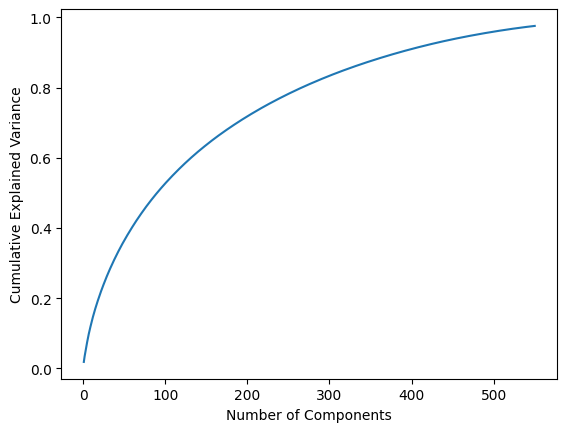

In [ ]:

plt.plot(range(1, n_components + 1), explained_variance_ratio.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
X_PCA=pca_result
# Split the data into training and testing sets
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature vectors (important for cosine distance)
# scaler = StandardScaler()
# X_train_PCA = scaler.fit_transform(X_train_PCA)
# X_test_PCA = scaler.transform(X_test_PCA)

In [ ]:
for i in range(2,14):
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train_PCA, y_train_PCA)
    # Make predictions on the test data
    y_pred_PCA = knn.predict(X_test_PCA)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test_PCA, y_pred_PCA)
    # classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy:.2f}")
    # print("Classification Report:\n", classification_rep)_PCA

Accuracy: 0.31
Accuracy: 0.51
Accuracy: 0.35
Accuracy: 0.49
Accuracy: 0.38
Accuracy: 0.49
Accuracy: 0.36
Accuracy: 0.47
Accuracy: 0.34
Accuracy: 0.41
Accuracy: 0.33
Accuracy: 0.38


# KNN with BERT

In [ ]:
df2=pd.read_csv("/content/BERT.csv")

In [ ]:
# Drop the first row from both X and y
X2 = df2.drop(['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder'], axis=1)  # Features (text data)
X2 = X2.iloc[1:]  # Drop the first row

y2 = df2[['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder']]  # Labels (encoded)
y2 = y2.iloc[1:]  # Drop the first row

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature vectors (important for cosine distance)
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [ ]:
for i in range(2,14):
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train2, y_train2)
    # Make predictions on the test data
    y_pred2 = knn.predict(X_test2)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test2, y_pred2)
    # classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy:.2f}")
    # print("Classification Report:\n", classification_rep)

Accuracy: 0.51
Accuracy: 0.66
Accuracy: 0.55
Accuracy: 0.64
Accuracy: 0.55
Accuracy: 0.60
Accuracy: 0.54
Accuracy: 0.61
Accuracy: 0.52
Accuracy: 0.57
Accuracy: 0.51
Accuracy: 0.54


BERT with pca

In [ ]:
n_components = 550  # Adjust this based on your needs
pca2 = PCA(n_components=n_components)
pca_result2 = pca2.fit_transform(X2)
explained_variance_ratio2 = pca2.explained_variance_ratio_

In [ ]:
np.sum(explained_variance_ratio2)


0.9989959312268667

In [ ]:
X_PCA2=pca_result2
# Split the data into training and testing sets
X_train_PCA2, X_test_PCA2, y_train_PCA2, y_test_PCA2 = train_test_split(X_PCA2, y2, test_size=0.2, random_state=42)
# Standardize the feature vectors (important for cosine distance)
# scaler = StandardScaler()
# X_train_PCA2 = scaler.fit_transform(X_train_PCA2)
# X_test_PCA2 = scaler.transform(X_test_PCA2)


In [ ]:
for i in range(2,14):
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train_PCA2, y_train_PCA2)
    # Make predictions on the test data
    y_pred_PCA2 = knn.predict(X_test_PCA2)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test_PCA2, y_pred_PCA2)
    # classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy:.2f}")
    # print("Classification Report:\n", classification_rep)

Accuracy: 0.50
Accuracy: 0.68
Accuracy: 0.54
Accuracy: 0.64
Accuracy: 0.54
Accuracy: 0.61
Accuracy: 0.54
Accuracy: 0.60
Accuracy: 0.51
Accuracy: 0.59
Accuracy: 0.51
Accuracy: 0.54


In [ ]:
# Concatenate X_PCA2 and y2 row-wise
X_PCA2_df=pd.DataFrame(X_PCA2)

# Create column names for X_PCA2
x_column_names = [f'f_{i}' for i in range(1, 551)]

# Rename the columns of X_PCA2
X_PCA2_df.columns = x_column_names

# Rename the columns of y2
y2.columns = ['Depression', 'Anxiety Disorder', 'Panic Disorder', 'Narcissistic Disorder', 'Anger/ Intermittent Explosive Disorder']


pca2_df = pd.concat([X_PCA2_df, y2], axis=1)

# Save the concatenated DataFrame to a CSV file
pca2_df.to_csv('BERT_PCA_DATA.csv', index=False)

# KNN with W2V

In [ ]:
df3=pd.read_csv("/content/word2vec_100dim_onehot.csv")

In [ ]:
# Drop the first row from both X and y
X3 = df3.drop(['class_0', 'class_1','class_2','class_3','class_4'], axis=1)  # Features (text data)
X3 = X3.iloc[1:]  # Drop the first row

y3 = df3[['class_0', 'class_1','class_2','class_3','class_4']]  # Labels (encoded)
y3 = y3.iloc[1:]  # Drop the first row

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Standardize the feature vectors (important for cosine distance)
# scaler = StandardScaler()
# X_train3 = scaler.fit_transform(X_train3)
# X_test3 = scaler.transform(X_test3)



In [ ]:
for i in range(2,14):
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train3, y_train3)

    # X_test = X_test.reshape(-1, 1)
    # Make predictions on the test data
    y_pred3 = knn.predict(X_test3)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test3, y_pred3)
    # classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy:.2f}")
    # print("Classification Report:\n", classification_rep)

Accuracy: 0.21
Accuracy: 0.38
Accuracy: 0.19
Accuracy: 0.32
Accuracy: 0.19
Accuracy: 0.25
Accuracy: 0.17
Accuracy: 0.22
Accuracy: 0.15
Accuracy: 0.17
Accuracy: 0.11
Accuracy: 0.15


W2V with PCA

In [ ]:
n_components = 50  # Adjust this based on your needs
pca3 = PCA(n_components=n_components)
pca_result3 = pca3.fit_transform(X3)
explained_variance_ratio3 = pca2.explained_variance_ratio_

In [ ]:
np.sum(explained_variance_ratio3)


0.9989959312268667

In [ ]:
X_PCA3=pca_result3
# Split the data into training and testing sets
X_train_PCA3, X_test_PCA3, y_train_PCA3, y_test_PCA3 = train_test_split(X_PCA3, y3, test_size=0.2, random_state=42)
# Standardize the feature vectors (important for cosine distance)
# scaler = StandardScaler()
# X_train_PCA3 = scaler.fit_transform(X_train_PCA3)
# X_test_PCA3 = scaler.transform(X_test_PCA3)3

In [ ]:
for i in range(2,14):
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train_PCA3, y_train_PCA3)
    # Make predictions on the test data
    y_pred_PCA3 = knn.predict(X_test_PCA3)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test_PCA3, y_pred_PCA3)
    # classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy:.2f}")
    # print("Classification Report:\n", classification_rep)

Accuracy: 0.25
Accuracy: 0.33
Accuracy: 0.24
Accuracy: 0.31
Accuracy: 0.20
Accuracy: 0.24
Accuracy: 0.17
Accuracy: 0.19
Accuracy: 0.16
Accuracy: 0.20
Accuracy: 0.11
Accuracy: 0.15


# Stamming and Stop word removal

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
# Load your DataFrame (replace 'your_data.csv' with your actual data file)
df = pd.read_csv('/content/test.csv')

In [ ]:
# Download the NLTK stopwords dataset if not already downloaded
nltk.download('stopwords')

# Initialize the Snowball stemmer for English
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Function to remove stopwords and perform stemming on a text
def preprocess_text(text):
    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word.lower() not in stopwords.words('english')]

    # Perform stemming
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join the words back into a sentence
    return ' '.join(stemmed_words)

# Apply the preprocessing function to the "Text" column
df['Text'] = df['Text'].apply(preprocess_text)

# Save the DataFrame to a new CSV file (replace 'preprocessed_data.csv' with your desired filename)
df.to_csv('preprocessed_data1.csv', index=False)


# BERT on modified data

In [ ]:
df4=pd.read_csv("/content/preprocessed_data.csv")

In [ ]:
embeddings = [calculate_embeddings(text) for text in df4["Text"]]

# Perform one-hot encoding for labels
label_encoder = OneHotEncoder(sparse_output=False)
labels_encoded = label_encoder.fit_transform(df4[["label"]])

# Save embeddings and one-hot encoded labels to a new CSV file
output_data = np.concatenate((embeddings, labels_encoded), axis=1)
output_columns = [f"embedding_{i}" for i in range(embeddings[0].shape[0])] + list(label_encoder.categories_[0])
output_df = pd.DataFrame(output_data, columns=output_columns)
output_df.to_csv("BERT_stemed.csv", index=False)

KNN


In [ ]:
df5=pd.read_csv("/content/BERT_stemed.csv")

In [ ]:
# Drop the first row from both X and y
X5 = df5.drop(['Anger/ Intermittent Explosive Disorder', 'Anxiety Disorder','Depression','Narcissistic Disorder','Panic Disorder'], axis=1)  # Features (text data)
X5 = X5.iloc[1:]  # Drop the first row

y5 = df5[['Anger/ Intermittent Explosive Disorder', 'Anxiety Disorder','Depression','Narcissistic Disorder','Panic Disorder']]  # Labels (encoded)
y5 = y5.iloc[1:]  # Drop the first row

# Split the data into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature vectors (important for cosine distance)
scaler = StandardScaler()
X_train5 = scaler.fit_transform(X_train5)
X_test5 = scaler.transform(X_test5)

In [ ]:
for i in range(2,14):
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train5, y_train5)
    # Make predictions on the test data
    y_pred5 = knn.predict(X_test5)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test5, y_pred5)
    # classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy:.2f}")
    # print("Classification Report:\n", classification_rep5

Accuracy: 0.28
Accuracy: 0.42
Accuracy: 0.27
Accuracy: 0.35
Accuracy: 0.27
Accuracy: 0.32
Accuracy: 0.20
Accuracy: 0.25
Accuracy: 0.20
Accuracy: 0.24
Accuracy: 0.18
Accuracy: 0.25


# tf-idf on modified data

In [ ]:
# Sample data
df6 =pd.read_csv("/content/preprocessed_data1.csv")

# Create a DataFrame from the sample data
# df = pd.DataFrame(data)

# # Define the labels
# labels = [
#     "Depression",
#     "Anxiety Disorder",
#     "Panic Disorder",
#     "Narcissistic Disorder",
#     "Anger/ Intermittent Explosive Disorder",
# ]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the "Text" column using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df6['Text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Label encoding for the "label" column
# label_encoder = LabelEncoder()
# df6['label_encoded'] = label_encoder.fit_transform(df6['label'])

# # One-hot encoding for the "label_encoded" column
# one_hot_encoder = OneHotEncoder(categories='auto', sparse_output=False)
# label_encoded = df6['label_encoded'].values.reshape(-1, 1)
# one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)

# # Convert the one-hot encoded labels to a DataFrame
# label_columns = [f'label_{label}' for label in labels]
# label_df = pd.DataFrame(one_hot_encoded, columns=label_columns)



# Concatenate the TF-IDF DataFrame and one-hot encoded label DataFrame
# result_df = pd.concat([tfidf_df, label_df], axis=1)
# result_df = pd.concat([tfidf_df], axis=1)

# Save the result to a CSV file
result_df.to_csv('test_stemed.csv', index=False)


In [ ]:
df6=pd.read_csv("/content/tfidf_stemed.csv")
# Drop the first row from both X and y
X6 = df6.drop(['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder'], axis=1)  # Features (text data)
X6 = X6.iloc[1:]  # Drop the first row

y6 = df6[['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder']]  # Labels (encoded)
y6 = y6.iloc[1:]  # Drop the first row

# Split the data into training and testing sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)

In [ ]:
for i in range(2,14):
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train6, y_train6)
    # Make predictions on the test data
    y_pred6 = knn.predict(X_test6)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test6, y_pred6)
    # classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy:.2f}")
    # print("Classification Report:\n", classification_rep)6

Accuracy: 0.36
Accuracy: 0.55
Accuracy: 0.37
Accuracy: 0.44
Accuracy: 0.33
Accuracy: 0.46
Accuracy: 0.32
Accuracy: 0.40
Accuracy: 0.34
Accuracy: 0.39
Accuracy: 0.29
Accuracy: 0.35


In [ ]:
n_components = 550  # Adjust this based on your needs
pca6 = PCA(n_components=n_components)
pca_result6 = pca6.fit_transform(X6)
explained_variance_rati6 = pca6.explained_variance_ratio_

In [ ]:
np.sum(explained_variance_rati6)

0.9902321196458865

In [ ]:
X_PCA6=pca_result6
# Split the data into training and testing sets
X_train_PCA6, X_test_PCA6, y_train_PCA6, y_test_PCA6 = train_test_split(X_PCA6, y6, test_size=0.2, random_state=42)

In [ ]:
# X_train_PCA6 = scaler.fit_transform(X_train_PCA6)
# X_test_PCA6 = scaler.transform(X_test_PCA6)

In [ ]:
for i in range(2,14):
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(X_train_PCA6, y_train_PCA6)
    # Make predictions on the test data
    y_pred_PCA6 = knn.predict(X_test_PCA6)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test_PCA6, y_pred_PCA6)
    # classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy:.2f}")
    # print("Classification Report:\n", classification_rep)_PCA

Accuracy: 0.38
Accuracy: 0.54
Accuracy: 0.37
Accuracy: 0.45
Accuracy: 0.39
Accuracy: 0.51
Accuracy: 0.35
Accuracy: 0.41
Accuracy: 0.33
Accuracy: 0.39
Accuracy: 0.31
Accuracy: 0.37


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df7=pd.read_csv("/content/tfidf_stemed (2).csv")


# Drop the first row from both X and y
X7 = df7.drop(['label'], axis=1)  # Features (text data)
X7 = X7.iloc[1:]  # Drop the first row

y7 = df7[['label']]  # Labels (encoded)
y7 = y7.iloc[1:]  # Drop the first row

# # Split your dataset into training and test sets
# X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Initialize the logistic regression model
# logistic_reg = LogisticRegression(max_iter=1000)
# Initialize the logistic regression model for multi-class classification
logistic_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_reg.fit(X7, y7)

X_test7=pd.read_csv("/content/test_stemed.csv")
X_test7 = X_test7.drop(['label'], axis=1)
X_test7 = X_test7.iloc[1:]
# Make predictions on the test data
y_pred7 = logistic_reg.predict(X_test7)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test7, y_pred7)

# print(f"Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred

array([4, 2, 0, 3, 4, 2, 2, 4, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 3, 0, 4,
       3, 4, 1, 0, 0, 1, 2, 1, 1, 1, 3, 2, 0, 2, 0, 3, 2, 1, 4, 4, 0, 2,
       3, 3, 1, 4, 3, 1, 4, 2, 2, 0, 4, 0, 1, 2, 0, 1, 4, 0, 2, 2, 1, 2,
       3, 0, 2, 0, 2, 2, 2, 3, 1, 3, 3, 3, 0, 4, 1, 1, 1, 2, 4, 0, 1, 2,
       1, 3, 0, 4, 3, 2, 0, 2, 1, 4, 0, 3, 1, 3, 2, 2, 2, 4, 1, 1, 1, 1,
       0, 1, 2, 1, 4, 2, 2, 2, 2, 3, 1, 2, 3, 3, 1, 0, 2, 4, 1, 0, 0, 3,
       3, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 4, 4, 0, 2, 1, 1, 1, 3, 2, 3,
       3, 4, 1])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
import xgboost as xgb

In [ ]:
df8=pd.read_csv("/content/BERT_PCA_DATA.csv")

# Drop the first row from both X and y
X8 = df8.drop(['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder'], axis=1)  # Features (text data)
X8 = X8.iloc[1:]  # Drop the first row

y8 = df8[['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder']]  # Labels (encoded)
y8 = y8.iloc[1:]  # Drop the first row

# # Drop the first row from both X and y
# X8 = df8.drop(['label'], axis=1)  # Features (text data)
# X8 = X8.iloc[1:]  # Drop the first row

# y8 = df8[['label']]  # Labels (encoded)
# y8 = y8.iloc[1:]  # Drop the first row

# Split the data into training and testing sets
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
# naive_bayes = GaussianNB()

# # Fit the model on the training data
# naive_bayes.fit(X_train8, y_train8)

# # Make predictions on the test data
# y_pred8 = naive_bayes.predict(X_test8)

# # Initialize the Multinomial Naive Bayes classifier
# naive_bayes = MultinomialNB()


# # Fit the model on the training data
# naive_bayes.fit(X_train8, y_train8)

# # Calculate log probabilities for each class
# log_probabilities = naive_bayes.predict_log_proba(X_test8)

# Make predictions on the test data
# y_pred8 = naive_bayes.predict(X_test8)
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the model on the training data
xgb_classifier.fit(X_train8, y_train8)

# Make predictions on the test data
y_pred8 = xgb_classifier.predict(X_test8)


# Calculate the accuracy of the model
accuracy = accuracy_score(y_test8, y_pred8)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.04


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df8=pd.read_csv("/content/BERT.csv")
# Drop the first row from both X and y
X8 = df8.drop(['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder'], axis=1)  # Features (text data)
X8 = X8.iloc[1:]  # Drop the first row

y8 = df8[['Depression', 'Anxiety Disorder','Panic Disorder','Narcissistic Disorder','Anger/ Intermittent Explosive Disorder']]  # Labels (encoded)
y8 = y8.iloc[1:]  # Drop the first row

# Split the data into training and testing sets
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=42)

# # Assuming X contains your features and y contains the corresponding labels
# # Split your dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train8, y_train8)

# Make predictions on the test data
y_pred8 = rf_classifier.predict(X_test8)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test8, y_pred8)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.29


In [ ]:
data = pd.read_csv('/content/SentenceBertEmbeddings.csv')

# Extract features (SentenceBertEmbeddings) and labels (label)
X = np.array(data['SentenceBertEmbeddings'].apply(eval).tolist())
y = data['label']

# Encode the class labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
X

array([[-0.01377617, -0.28504047,  0.38752916, ...,  0.21610655,
        -0.15535286, -0.00711704],
       [ 0.30716705,  0.10577666,  0.04163367, ...,  0.11682658,
        -0.4932412 , -0.60712725],
       [ 0.5268184 , -0.59319836,  0.23147163, ..., -0.06391711,
        -0.18573067, -0.19536935],
       ...,
       [ 0.13348593,  0.19679104,  0.15195313, ..., -0.08953505,
        -0.21710011,  0.17455149],
       [ 0.26707393, -0.33309382,  0.30789402, ..., -0.1574545 ,
        -0.2554066 , -0.26063567],
       [ 0.22209603, -0.01163694, -0.00890747, ..., -0.17369   ,
        -0.77342576,  0.02498917]])

In [ ]:
y_encoded

array([2, 1, 2, 4, 4, 4, 4, 2, 1, 0, 2, 0, 2, 1, 0, 3, 0, 0, 1, 3, 0, 0,
       2, 1, 4, 1, 0, 0, 4, 3, 2, 2, 0, 2, 3, 3, 1, 1, 3, 2, 2, 3, 4, 1,
       2, 3, 2, 3, 1, 0, 2, 3, 3, 2, 1, 3, 2, 4, 3, 4, 4, 4, 2, 2, 0, 2,
       2, 2, 2, 0, 4, 2, 1, 2, 3, 2, 1, 4, 1, 3, 2, 1, 0, 0, 4, 2, 1, 3,
       1, 2, 3, 4, 3, 1, 2, 1, 4, 0, 4, 1, 3, 4, 2, 1, 1, 3, 4, 4, 0, 2,
       2, 0, 1, 4, 3, 2, 1, 4, 0, 3, 1, 3, 2, 2, 3, 4, 2, 1, 4, 0, 2, 1,
       3, 1, 0, 1, 3, 0, 4, 2, 2, 0, 2, 2, 0, 4, 0, 0, 3, 2, 3, 2, 2, 0,
       3, 1, 0, 4, 2, 1, 1, 2, 3, 0, 2, 3, 3, 0, 2, 0, 3, 0, 1, 4, 0, 2,
       1, 2, 4, 0, 3, 2, 0, 0, 2, 0, 3, 4, 0, 2, 4, 3, 1, 3, 1, 4, 0, 4,
       2, 3, 2, 2, 3, 2, 4, 3, 2, 2, 1, 1, 3, 0, 1, 1, 3, 2, 2, 2, 2, 1,
       1, 4, 3, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 4, 3, 1, 0, 0, 0, 2, 0, 4,
       4, 2, 3, 0, 0, 0, 2, 2, 4, 2, 0, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0,
       4, 2, 2, 3, 4, 3, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 3, 0, 0, 1, 2, 3,
       3, 2, 4, 4, 4, 0, 0, 3, 3, 1, 1, 2, 0, 2, 3,

In [ ]:
# Initialize the XGBoost classifier for multi-class classification
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_classes=len(label_encoder.classes_))

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

[17:18:22] WARNING: ../src/learner.cc:767: 
Parameters: { "num_classes" } are not used.

Accuracy: 0.65


In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# Initialize base models (XGBoost)
base_model_1 = xgb.XGBClassifier(objective='multi:softmax')
base_model_2 = xgb.XGBClassifier(objective='multi:softmax')

# Initialize meta-learner (Logistic Regression)
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Create a StackingClassifier
stacked_classifier = StackingClassifier(
    estimators=[('xgb1', base_model_1), ('xgb2', base_model_2)],
    final_estimator=meta_learner,
    cv=5  # Number of cross-validation folds for training base models
)

# Fit the stacked classifier on the training data
stacked_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacked_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66
